#### 주어진 데이터 집합을 유사한 데이터들의 그룹으로 나누는 것을 클러스터링(clustering)이라고 하고 이렇게 나누어진 유사한 데이터의 그룹을 클러스터(cluster)라 한다.

클러스터링은 예측(prediction) 문제와 달리 특정한 독립변수와 종속변수의 구분도 없고 학습을 위한 목표값(target value)도 필요로 하지 않는 비지도학습(unsupervised learning)의 일종이다.

## 클러스터링 방법

대부분의 클러스터링 방법들도 예측모형과 같이 특정한 목표함수의 값을 최소화 혹은 최대화하지만,

#### 예측모형과 달리 다만 목표함수가 명확히 주어지지 않았기 때문에 목표함수의 정의 및 최적화 방법들이 각기 다른 다양한 클러스터링 방법이 존재한다. 

다음과 같은 클러스터링 방법이 많이 쓰인다.

+ K-means
+ DBSCAN
+ Spectral Clustering
+ Affinity Propagation
+ 계층적 클러스터링(Hierarchical Clustering)

클러스터링 방법은 사용법과 모수 등이 서로 다르다. 

#### 예를 들어 K-means, Spectral Clustering 등은 클러스터의 갯수를 미리 지정해주어햐 하지만 DBSCAN이나 Affinity Propagation 등은 클러스터의 갯수를 지정할 필요가 없다. 

다만 이 경우에는 다른 종류의 모수를 지정해주어야 하는데 이 모수의 값에 따라 클러스터링 갯수가 달라질 수 있다.

다음은 몇가지 예제 데이터에 대해 이 클러스터링 방법을 적용한 결과이다. 같은 색상의 데이터는 같은 클러스터로 분류된 것이다. 그림에서 보다시피 각 클러스터링 방법마다 특성이 다르므로 원하는 목적과 데이터 유형에 맞게 사용해야 한다. 

#### 또한 지정된 모수의 값에 따라 성능이 달라질 수 있다. 이 결과는 최적화된 모수를 사용한 결과는 아니라는 점에 유의하라.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [2]:
from sklearn.datasets import *
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.utils.testing import ignore_warnings

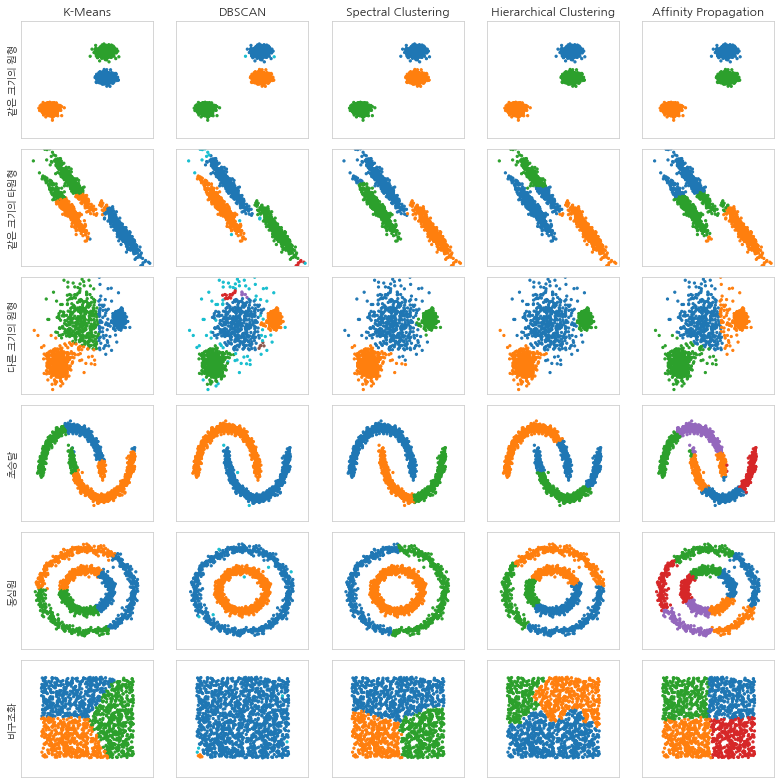

In [4]:
np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
no_structure = np.random.rand(n_samples, 2), None

datasets = {
    '같은 크기의 원형': blobs,
    '같은 크기의 타원형': anisotropic,
    '다른 크기의 원형': varied,
    '초승달': noisy_moons,
    '동심원': noisy_circles,
    '비구조화': no_structure,
}

plt.figure(figsize=(11, 11))
plot_num = 1
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    X = StandardScaler().fit_transform(X)
    two_means = MiniBatchKMeans(n_clusters=3)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=3)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Spectral Clustering', spectral),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
    )
    
    for j, (name, algorithm) in enumerate(clustering_algorithms):
        with ignore_warnings(category=UserWarning):
            algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks([])
        plt.yticks([])
        plot_num += 1
        
plt.tight_layout()
plt.show()

## 클러스터링 성능기준

클러스터링 성능의 경우에는 분류문제와 달리 성능기준을 만들기 어렵다. 심지어는 원래 데이터가 어떻게 클러스터링되어 있었는지를 보여주는 정답(groundtruth)이 있는 경우도 마찬가지이다. 따라서 다양한 성능기준이 사용되고 있다. 다음의 클러스터링 성능기준의 예이다.

+ Adjusted Rand Index
+ Adjusted Mutual Information
+ Silhouette Coefficient

## Incidence Matrix

#### (adjusted) Rand index를 구하려면 데이터가 원래 어떻게 클러스터링되어 있어야 하는지를 알려주는 정답(groundtruth)이 있어야 한다.  

𝑁 개의 데이터 집합에서  𝑖 ,  𝑗  두 개의 데이터를 선택하였을 때 그 두 데이터가 같은 클러스터에 속하면 1 다른 데이터에 속하면 0이라고 하자. 이 값을  𝑁×𝑁  행렬  𝑇 로 나타내자.

$$T_{ij} = 
\begin{cases} 
1 & \text{ $i$와 $j$가 같은 클러스터} \\
0 & \text{ $i$와 $j$가 다른 클러스터} \\
\end{cases}$$

예를 들어  {0,1,2,3,4} 라는 5개의 데이터 집합에서  {0,1,2} 과  {3,4} 이 같은 클러스터라면 다음과 같아진다.

In [5]:
groundtruth = np.array([
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1],
])

이제 클러스터링을 적용한 결과를 같은 방법으로 행렬  𝐶 로 표시하자. 

만약 클러스터링이 정확하다면 이 행렬은 정답을 이용해서 만든 행렬과 거의 같은 값을 가져야 한다. 만약 클러스터링 결과  {0,1,} 과  {2,3,4} 이 같은 클러스터라면 다음과 같아진다.

In [6]:
clustering = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1],
])

이 두 행렬의 모든 원소에 대해 값이 같으면 1 다르면 0으로 계산한 행렬을 incidence matrix라고 한다. 즉 데이터 집합에서 만들수 있는 모든 데이터 쌍에 대해 정답과 클러스터링 결과에서 동일한 값을 나타내면 1, 다르면 0이 된다.

$$R_{ij} = 
\begin{cases} 
1 & \text{ if } T_{ij} = C_{ij} \\
0 & \text{ if } T_{ij} \neq C_{ij} \\
\end{cases}$$

즉, 원래 정답에서 1번 데이터와 2번 데이터가 다른 클러스터인데 클러스터링 결과에서도 다른 클러스터라고 하면  𝑅12=0 이다.

위 예제에서 incidence matrix를 구하면 다음과 같다.

In [7]:
incidence = 1 * (groundtruth == clustering)
incidence

array([[1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 1],
       [1, 1, 0, 1, 1]])

## Adjusted Rand Index

Rand index는 가능한 모든 쌍의 경우에 대해 정답인 쌍의 갯수의 비율로 정의한다. 
#### 이 값은 groundtruth를 목표값, 클러스터링 결과를 예측값으로 하는 이진분류문제의 정확도(accuracy)에 해당한다.

In [8]:
rand_index = np.sum(incidence) / np.prod(incidence.shape)  # 25개 중 17개 1값
rand_index

0.68

Rand index는 0부터 1까지의 값을 가지고 1이 가장 좋은 성능을 뜻한다. 

#### Rand index의 문제점은 무작위로 클러스터링을 한 경우에도 어느 정도 좋은 값이 나올 가능성이 높다는 점이다. 

즉 무작위 클러스터링에서 생기는 Rand index의 기댓값이 너무 크다. 이를 해결하기위해 

#### 무작위 클러스터링에서 생기는 Rand index의 기댓값을 원래의 값에서 빼서 기댓값과 분산을 재조정한 것이 adjusted Rand index다. 

adjusted Rand index는 무작위 클러스터링의 경우에 0이 나올 확률이 높다. 하지만 경우에 따라서는 음수가 나올 수도 있다.

adjusted Rand index를 계산하려면 다음과 같은 contingency table을 만들어야 한다. contingency table은 정답과 클러스터링 결과에서 각각 같은 클러스터에 속하는 데이터의 갯수를 나타낸 것이다.

정답은

$$T=\{T_1, T_2,\ldots, T_r\}$$

의  𝑟 개의 클러스터이고 클러스터링 결과는

$$C=\{C_1, C_2,\ldots, C_s\}$$

의  𝑠 개의 클러스터라고 가정한다.

$$\begin{array}{c|cccc|c}
T \; \backslash \; C &
C_1&
C_2&
\ldots&
C_s&
\text{소계}
\\
\hline
T_1&
n_{11}&
n_{12}&
\ldots&
n_{1s}&
a_1
\\
T_2&
n_{21}&
n_{22}&
\ldots&
n_{2s}&
a_2
\\
\vdots&
\vdots&
\vdots&
\ddots&
\vdots&
\vdots
\\
T_r&
n_{r1}&
n_{r2}&
\ldots&
n_{rs}&
a_r
\\
\hline
\text{소계}&
b_1&
b_2&
\ldots&
b_s&
\end{array}$$

+ 𝑛𝑖𝑗 : 정답에서는 클러스터  𝑇𝑖 에 속하고 클러스터링 결과에서는 클러스터  𝐶𝑗 에 속하는 데이터의 수
+ 𝑎𝑖=∑𝑠𝑗=1𝑛𝑖𝑗 
+ 𝑏𝑗=∑𝑟𝑖=1𝑛𝑖𝑗

무작위 클러스터링의 rand index 기댓값을 구하는 공식을 적용하면 adjusted Rand index값이 다음과 같이 정의된다.

$$\text{ARI} = \frac{ \overbrace{\sum_{ij} \binom{n_{ij}}{2}}^\text{Index} - \overbrace{[\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}^\text{기댓값} }{ \underbrace{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}]}_\text{최댓값} - \underbrace{[\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}_\text{기댓값} }$$

위에서 예로 들었던 타원형 데이터 예제에 대해 여러가지 클러스터링 방법을 적용하였을때 adjusted Rand index 값을 계산해보면 DBSCAN과 Spectral Clustering의 값이 높게 나오는 것을 확인할 수 있다. 

#### scikit-learn 패키지의 metrics.cluster 서브패키지는 adjusted_rand_score 명령을 제공한다.

In [12]:
from sklearn.metrics.cluster import adjusted_rand_score

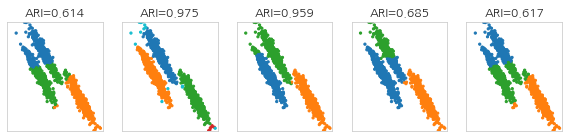

In [23]:
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
X, y_true = anisotropic

plt.figure(figsize=(12, 2))
plot_num = 1
X = StandardScaler().fit_transform(X)
for name, algorithm in clustering_algorithms:
    with ignore_warnings(category=UserWarning):
        algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)
    
    title = "ARI={:5.3f}".format(adjusted_rand_score(y_true, y_pred))
    plt.subplot(1, len(datasets), plot_num)
    plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plot_num += 1

algorithm :

        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Spectral Clustering', spectral),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
        
두번째인 DBSCAN과 세번째인 Apectral clustering 알고리즘이 가장 성능이 좋은 것으로 나타난다.

## Adjusted Mutual Information

#### mutual information은 두 확률변수간의 상호 의존성을 측정한 값이다. 클러스터링 결과를 이산확률변수라고 가정한다.

정답은

$$T = \{T_1, T_2,\ldots, T_r\}$$

의  𝑟 개의 값을 가질 수 있는 이산확률변수이고 클러스터링 결과는

$$C = \{C_1, C_2,\ldots, C_s\}$$

의  𝑠 개의 값을 가질 수 있는 이산확률변수라고 하자.

전체 데이터의 갯수를  𝑁 이라고 하면 이산확률변수  𝑇 의 분포는

$$P(i)=\frac{|T_i|}{N}$$

로 추정할 수 있다. 이 식에서  |𝑇𝑖| 는 클러스터  𝑇𝑖 에 속하는 데이터의 갯수를 나타낸다.

비슷하게 이산확률변수  𝐶 의 분포는

$$P'(j)=\frac{|C_i|}{N}$$

라고 추정하고  𝑇 와  𝐶 의 결합확률분포는

$$P(i,j)=\frac{|T_i \cap C_j|}{N}$$

라고 추정한다. 여기에서  |𝑇𝑖∩𝐶𝑗| 는 클러스터  𝑇𝑖 에도 속하고 클러스터  𝐶𝑗 에도 속하는 데이터의 갯수를 나타낸다.

확률변수  𝑇,𝐶 의 mutual information은

$$MI(T,C)=\sum_{i=1}^r \sum_{j=1}^s P(i,j)\log \frac{P(i,j)}{P(i)P'(j)}$$

로 정의한다.

만약 두 확률변수가 서로 독립이면 mutual information의 값은 0이며 이 값이 mutual information이 가질 수 있는 최소값이다. 두 확률변수가 의존성이 강할수록 mutual information는 증가한다. 

#### 클러스터의 갯수가 많아질수록 mutual information이 증가하므로 올바른 비교가 어렵다. 

#### 따라서 adjusted Rand index의 경우와 마찬가지로 각 경우에 따른 mutual information 기댓값을 빼서 재조정한 것이 adjusted mutual information이다.

다음은 위에서 예로 들었던 타원형 데이터 예제에 대해 여러가지 클러스터링 방법을 적용하였을때 adjusted mutual information 값을 계산한 결과이다. 

#### scikit-learn 패키지의 metrics.cluster 서브패키지는 adjusted_mutual_info_score 명령을 제공한다.

In [24]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

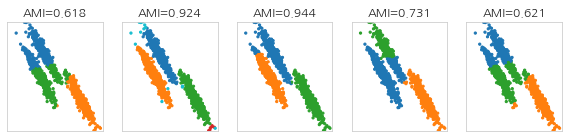

In [26]:
X, y_true = anisotropic

plt.figure(figsize=(12, 2))
plot_num = 1
X = StandardScaler().fit_transform(X)
for name, algorithm in clustering_algorithms:
    with ignore_warnings(category=UserWarning):
        algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)
        
    title = "AMI={:5.3f}".format(adjusted_mutual_info_score(y_true, y_pred))
    plt.subplot(1, len(datasets), plot_num)
    plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])  # 클러스터별로 색을 다른 것으로 선택
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plot_num += 1


algorithm :

    ('K-Means', two_means),
    ('DBSCAN', dbscan),
    ('Spectral Clustering', spectral),
    ('Hierarchical Clustering', ward),
    ('Affinity Propagation', affinity_propagation),

이 경우에는 Spectral clustering의 알고리즘이 가장 높게 나오고 있고, 다음으로는 DBSCAN이다.

## 실루엣 계수

지금까지는 각각의 데이터가 원래 어떤 클러스터에 속해 있었는지 정답(groundtruth)를 알고 있는 경우를 다루었다. 

#### 하지만 이러한 정답 정보가 없다면 어떻게 클러스터링이 잘 되었는지 판단할 수 있을까? 실루엣 계수(Silhouette coefficient)는 이러한 경우에 클러스터링의 성능을 판단하기 위한 기준의 하나이다.

#### 우선 모든 데이터 쌍  (𝑖,𝑗) 에 대해 거리(distance) 혹은 비유사도(dissimilarity)을 구한다. 

이 결과를 이용하여 모든 데이터  𝑖 에 대해 다음 값을 구한다.

+ 𝑎𝑖  :  𝑖 와 같은 클러스터에 속한 원소들의 평균 거리
+ 𝑏𝑖  :  𝑖 와 다른 클러스터 중 가장 가까운 클러스터까지의 평균 거리

이 때 데이터  𝑖 에 대한 실루엣 계수는

$$s_i = \dfrac{b_i - a_i}{\max{(a_i, b_i)}}$$

로 정의한다. 전체 데이터의 실루엣 계수의 평균을 구한 값을 평균 실루엣 계수라고 한다.

#### 만약 데이터  𝑖 에 대해 같은 클러스터의 데이터가 다른 클러스터의 데이터보다 더 가깝다면 그 데이터의 실수엣 계수는 양수가 된다. 하지만 만약 다른 클러스터의 데이터가 같은 클러스터의 데이터보다 더 가깝다면 클러스터링이 잘못된 경우라고 볼 수 있는데 이 때는 그 데이터의 실루엣 계수가 음수가 된다. 

#### 잘못된 클러스터링에서는 실루엣 계수가 음수인 데이터가 많아지므로 평균 실루엣 계수가 작아진다. 따라서 실루엣 계수가 클수록 좋은 클러스터링이라고 할 수 있다.

클러스터링 방법 중에는 클러스터의 갯수를 사용자가 정해주어야 하는 것들이 있는데 실루엣 계수는 이 경우 클러스터의 갯수를 정하는데 큰 도움이 된다. 앞에서 예로 들었던 3개의 원형 데이터에 대해 KMean 방법으로 클러스터 갯수를 바꾸어가면서 클러스터링 결과를 살펴보자.

#### scikit-learn 패키지의 metrics 서브패키지는 실루엣 계수를 계산하는 silhouette_samples 명령을 제공한다.

In [27]:
from sklearn.metrics import silhouette_samples

In [34]:
def plot_silhouette(data):
    X, y = make_blobs(n_samples=n_samples, random_state=170)

    X = StandardScaler().fit_transform(data[0])
    colors = plt.cm.tab10(np.arange(20, dtype=int))
    plt.figure(figsize=(6, 8))
    for i in range(4):
        model = SpectralClustering(n_clusters=i + 2, affinity="nearest_neighbors")
        cluster_labels = model.fit_predict(X)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        silhouette_avg = sample_silhouette_values.mean()

        plt.subplot(4, 2, 2 * i + 1)
        y_lower = 10
        for j in range(i + 2):
            jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
            jth_cluster_silhouette_values.sort()
            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, jth_cluster_silhouette_values,
                              facecolor=colors[j], edgecolor=colors[j])
            plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j + 1))
            plt.axvline(x=silhouette_avg, color="red", linestyle="--")
            plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.yticks([])
            plt.title("실루엣 계수 평균: {:5.2f}".format(silhouette_avg))
            y_lower = y_upper + 10


        plt.subplot(4, 2, 2 * i + 2)
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[cluster_labels])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.title("클러스터 수: {}".format(i + 2))

    plt.tight_layout()
    plt.show()

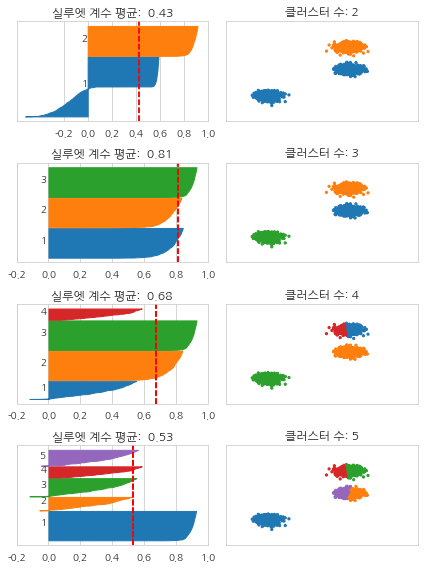

In [35]:
blobs = make_blobs(n_samples=n_samples, random_state=8)

plot_silhouette(blobs)

다만 실루엣 계수는 클러스터의 형상이 복잡하거나 크기의 차이가 많이나면 정상적인 비교가 불가능하다.

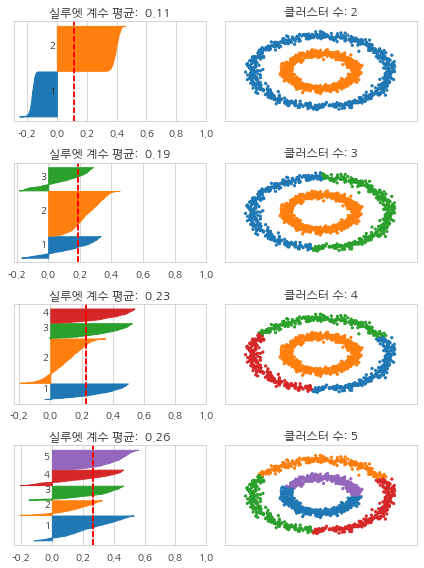

In [36]:
plot_silhouette(noisy_circles)